In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy 
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
df = pd.read_csv('../docs 2nd Approach/relative_error.csv')
df = df.apply(lambda x: x.sort_values().values)


list_voltage = []
for i in df.columns:
    list_voltage.append(str(i))

df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=list_voltage)
# replace column names
df_melt.columns = ['index', 'voltage', 'value']
df_melt

,index,voltage,value
0,0,0.5v,-24.000000
1,1,0.5v,-24.000000
2,2,0.5v,-24.000000
3,3,0.5v,-18.000000
4,4,0.5v,-14.000000
...,...,...,...
8995,995,24.5v,0.285714
8996,996,24.5v,0.285714
8997,997,24.5v,0.285714
8998,998,24.5v,0.285714


In [3]:
for i in df.columns:
    df_remove = df.drop(df[
        (df[i] > df[i].mean() + df[i].std()) | 
        (df[i] < df[i].mean() - df[i].std())
    ].index)

df_remove = df_remove.reset_index(drop=True)
df_remove

,0.5v,3v,6v,9v,12v,15v,18v,21v,24.5v
0,-10.0,-0.333333,-0.500000,-0.333333,-0.333333,-0.266667,-0.055556,-0.047619,0.000000
1,-10.0,-0.333333,-0.500000,-0.333333,-0.333333,-0.266667,-0.055556,-0.047619,0.000000
2,-10.0,-0.333333,-0.500000,-0.333333,-0.333333,-0.266667,-0.055556,-0.047619,0.000000
3,-4.0,-0.333333,-0.500000,-0.333333,-0.333333,-0.266667,-0.055556,-0.047619,0.000000
4,-4.0,-0.333333,-0.500000,-0.333333,-0.333333,-0.266667,-0.055556,-0.047619,0.000000
...,...,...,...,...,...,...,...,...,...
835,6.0,1.333333,0.166667,0.111111,0.083333,0.066667,0.222222,0.190476,0.081633
836,6.0,1.333333,0.166667,0.111111,0.083333,0.066667,0.222222,0.190476,0.081633
837,6.0,1.333333,0.166667,0.111111,0.083333,0.066667,0.222222,0.190476,0.081633
838,6.0,1.333333,0.166667,0.111111,0.083333,0.066667,0.222222,0.190476,0.081633


In [4]:

list_voltage = []
for i in df_remove.columns:
    list_voltage.append(str(i))

df_melt = pd.melt(df_remove.reset_index(), id_vars=['index'], value_vars=list_voltage)
# replace column names
df_melt.columns = ['index', 'voltage', 'value']
df_melt

,index,voltage,value
0,0,0.5v,-10.000000
1,1,0.5v,-10.000000
2,2,0.5v,-10.000000
3,3,0.5v,-4.000000
4,4,0.5v,-4.000000
...,...,...,...
7555,835,24.5v,0.081633
7556,836,24.5v,0.081633
7557,837,24.5v,0.081633
7558,838,24.5v,0.081633


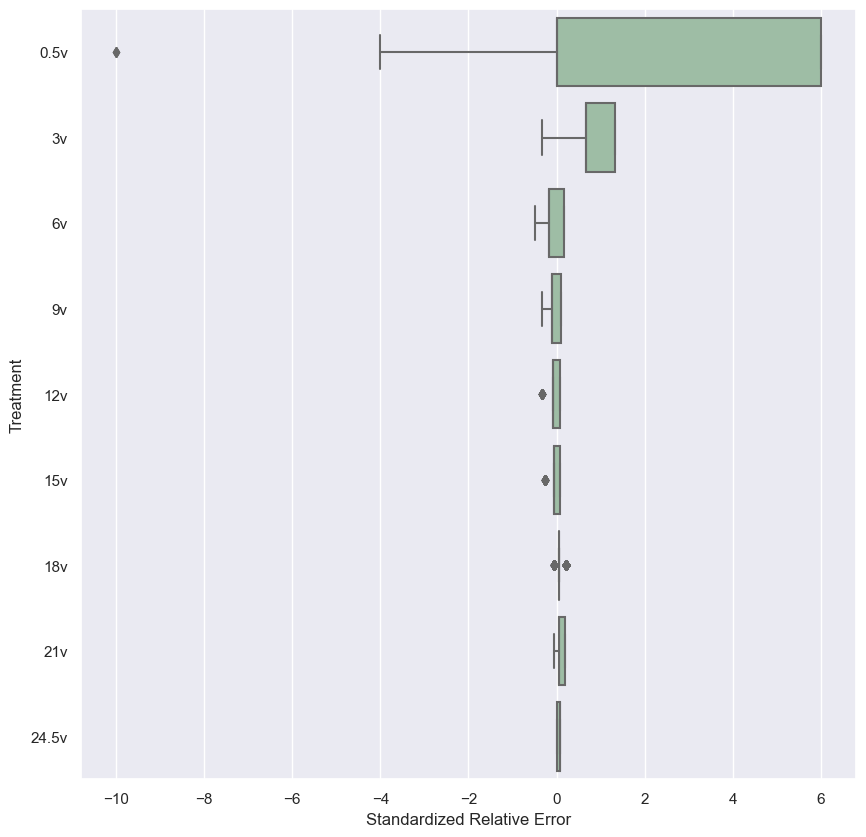

In [5]:
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style('darkgrid')
ax = sns.boxplot(x='value', y='voltage', data=df_melt, color='#99c2a2')
ax.set(xlabel='Standardized Relative Error', ylabel='Treatment')
plt.savefig('../docs 2nd Approach/img/Boxplot Remove Outlier STD Based from each variation sample.png')
plt.show()

Text(0, 0.5, 'Relative Error Voltage')

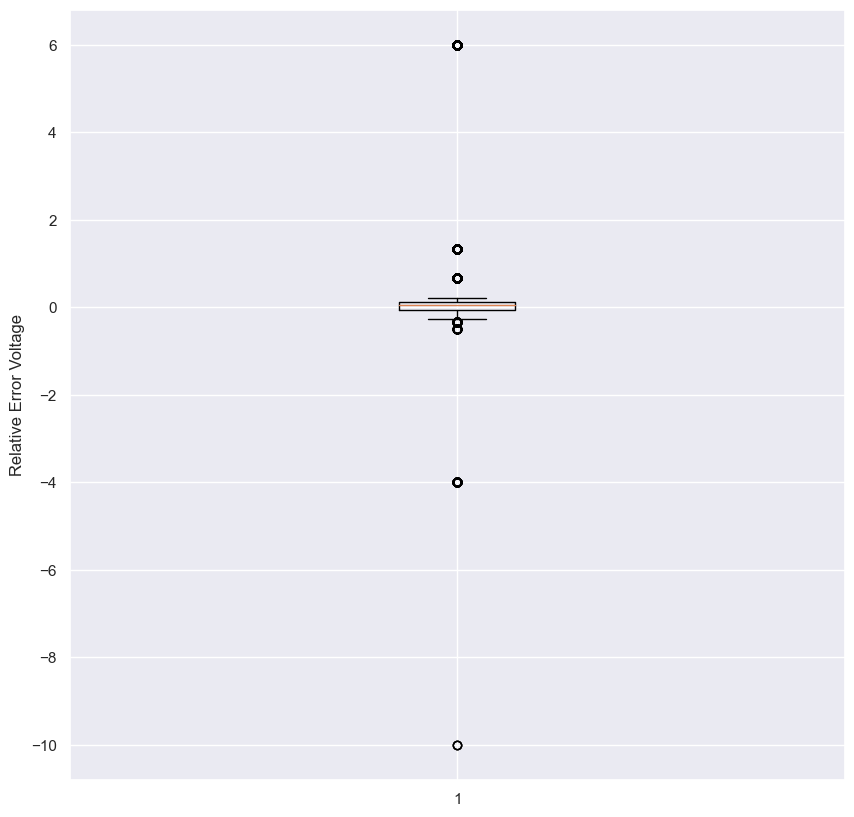

In [6]:
plt.boxplot(df_melt['value'])
plt.ylabel('Relative Error Voltage')

In [7]:
df_melt.to_csv('../docs 2nd Approach/remove_outlier_each_std.csv', index=False)

In [8]:
0.06449091372411075 + 0.024386004366555764 * 120

2.9908114377108026